<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

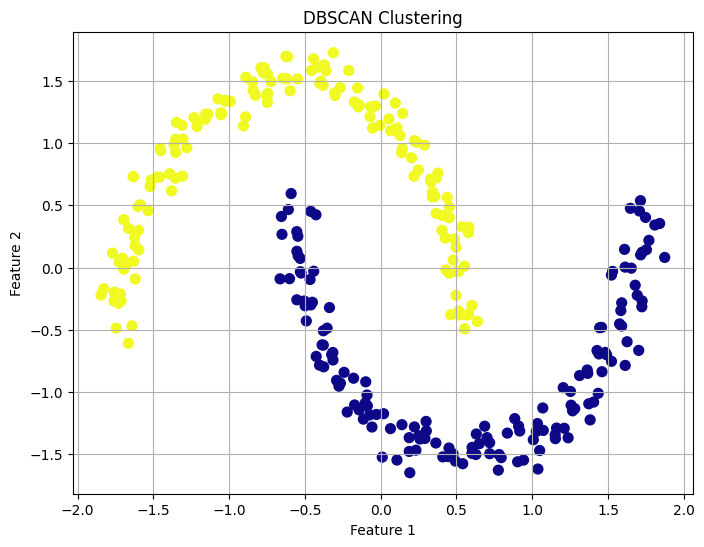

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [7]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True


In [8]:
labels = dbscan.labels_
unique_labels = set(labels)

In [9]:
plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

<Figure size 800x600 with 0 Axes>

In [10]:
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'


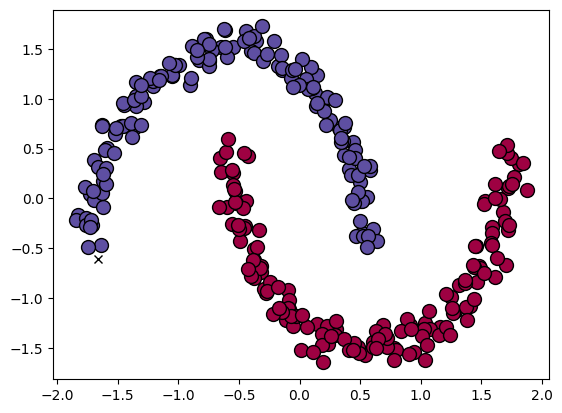

In [12]:
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'

    class_member_mask = (labels == k)


    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10, label=f'Cluster {k}' if k != -1 else 'Noise')


    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

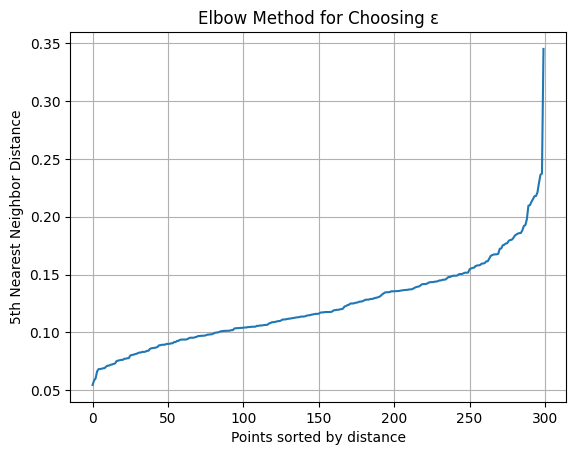

In [14]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("Elbow Method for Choosing ε")
plt.grid(True)
plt.show()
